In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data=pd.read_csv('/content/catalog.csv')





In [ ]:
# Step 1: Handling Missing Values
# Drop columns with too many missing values (e.g., 'time', 'continent_code', 'location_description')
data.drop(columns=['time', 'continent_code', 'location_description', 'storm_name','source_name','source_link'],inplace=True)

# Fill missing values for numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# # Fill missing values for categorical columns with mode
# categorical_cols = data.select_dtypes(include=['object']).columns
# data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# # Step 2: Converting Data Types
# # Convert 'date' column to datetime
# data['date'] = pd.to_datetime(data['date'], errors='coerce')

# # Step 3: Handling Categorical Variables
# # One-hot encode categorical variables
# data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# # Step 4: Scaling and Normalization
# # Standardize numerical features
# scaler = StandardScaler()
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# # Step 6: Splitting Data (if needed for modeling)
# # Split the data into features (X) and target (y)
# X = data.drop(columns=['fatalities'])
# y = data['fatalities']

# # Optional: Split into training and testing datasets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Display the first few rows of the preprocessed data
# print(data.head())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   country_name    1693 non-null   object 
 3   country_code    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   city/town       1689 non-null   object 
 7   distance        1693 non-null   float64
 8   latitude        1693 non-null   float64
 9   longitude       1693 non-null   float64
 10  geolocation     1692 non-null   object 
 11  hazard_type     1693 non-null   object 
 12  landslide_type  1692 non-null   object 
 13  landslide_size  1692 non-null   object 
 14  trigger         1691 non-null   object 
 15  injuries        1693 non-null   float64
 16  fatalities      1693 non-null   float64
dtypes: float64(5), int64(2), object(1

In [ ]:
data.describe()

,id,population,distance,latitude,longitude,injuries,fatalities
count,1693.000000,1.693000e+03,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,4145.027761,9.345940e+04,7.822695,27.715661,-86.883660,0.526214,1.459198
std,2236.741960,5.226016e+05,9.355490,14.202143,14.328575,1.889125,8.487827
min,34.000000,0.000000e+00,0.000030,-10.125800,-117.309200,0.000000,0.000000
25%,2330.000000,2.080000e+03,1.936760,14.086500,-92.638900,0.000000,0.000000
50%,4087.000000,5.785000e+03,4.540950,35.609200,-83.664300,0.526214,0.000000
75%,6098.000000,1.886700e+04,9.873310,39.545900,-78.874000,0.526214,1.459198
max,7541.000000,1.229419e+07,74.460970,45.425700,-45.601000,45.000000,280.000000


from matplotlib import pyplot as plt
_df_17['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='id', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='population', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='distance', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

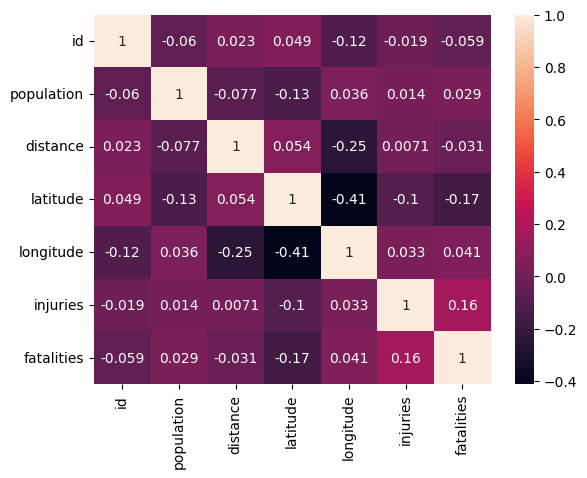

In [ ]:

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=[np.number])

heatmap = sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

<ipython-input-266-50dbf56f5a6d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] =pd.to_datetime(data['date'], errors='coerce')
<ipython-input-266-50dbf56f5a6d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatalities_per_year, x='fatalities', y='year', palette='viridis')


     year  fatalities
0  2007.0  303.041494
1  2008.0  374.439834
2  2009.0  107.428769
3  2010.0  489.459198
4  2011.0  255.459198
5  2012.0  138.663900
6  2013.0  304.929461
7  2014.0  104.000000
8  2015.0  393.000000
9  2016.0    0.000000


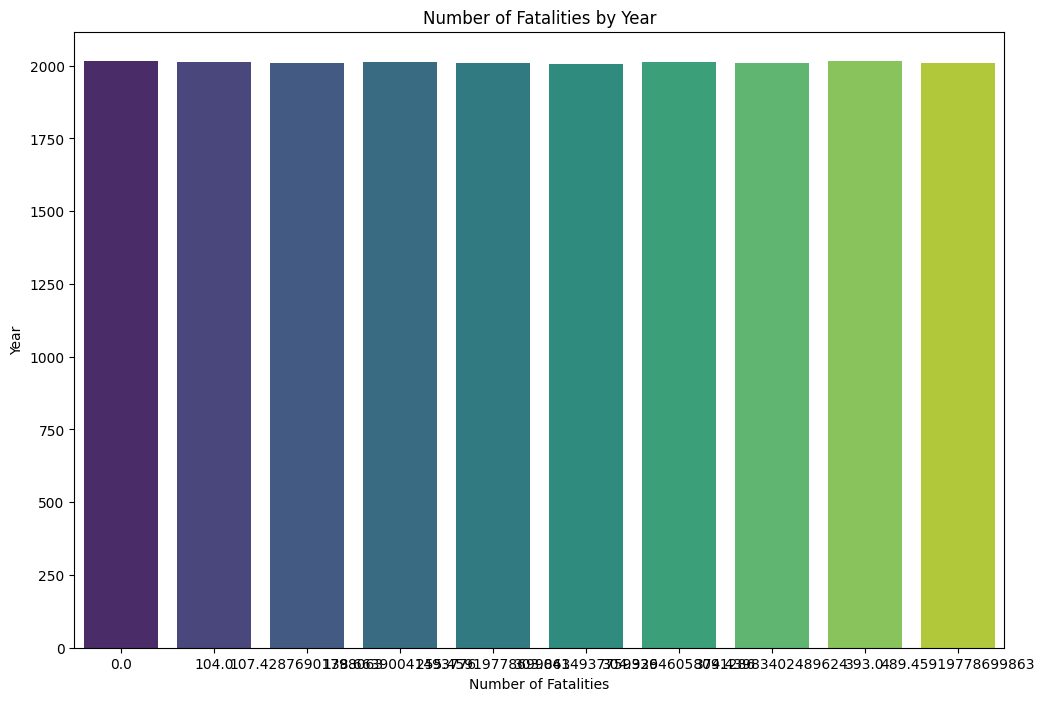

In [ ]:
# Convert the date column to datetime format and extract the year
# Convert the date column to datetime format and handle errors
data['date'] =pd.to_datetime(data['date'], errors='coerce')

# Extract the year from the date column
data['year'] = data['date'].dt.year

# Ensure the fatalities column is numerical
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')

# Group by year and sum the fatalities
fatalities_per_year = data.groupby('year')['fatalities'].sum().reset_index()

# Display the grouped data to ensure correctness
print(fatalities_per_year)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=fatalities_per_year, x='fatalities', y='year', palette='viridis')
plt.xlabel('Number of Fatalities')
plt.ylabel('Year')
plt.title('Number of Fatalities by Year')
plt.show()

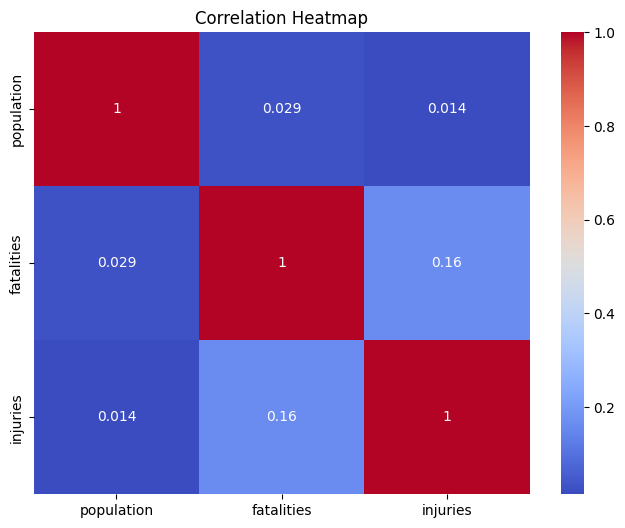

In [ ]:
#Correlation Analysis

corr = data[['population', 'fatalities', 'injuries']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-268-a53090534a02>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


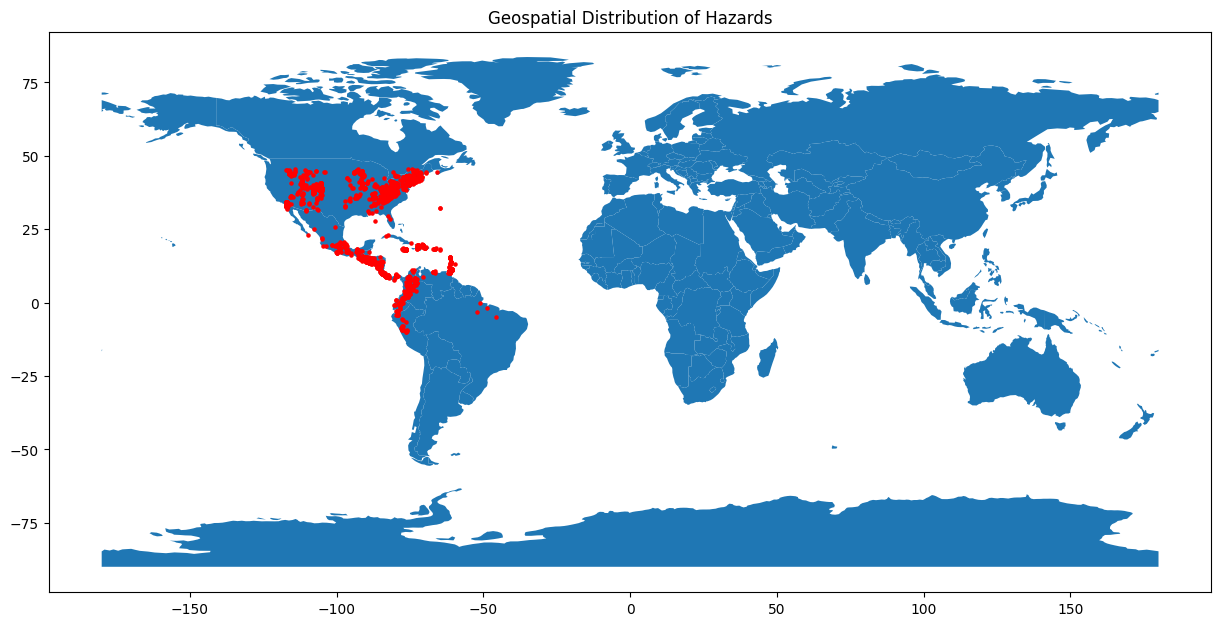

In [ ]:
#Geospatial Analysis
# Create a GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the data
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plotting the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Distribution of Hazards')
plt.show()

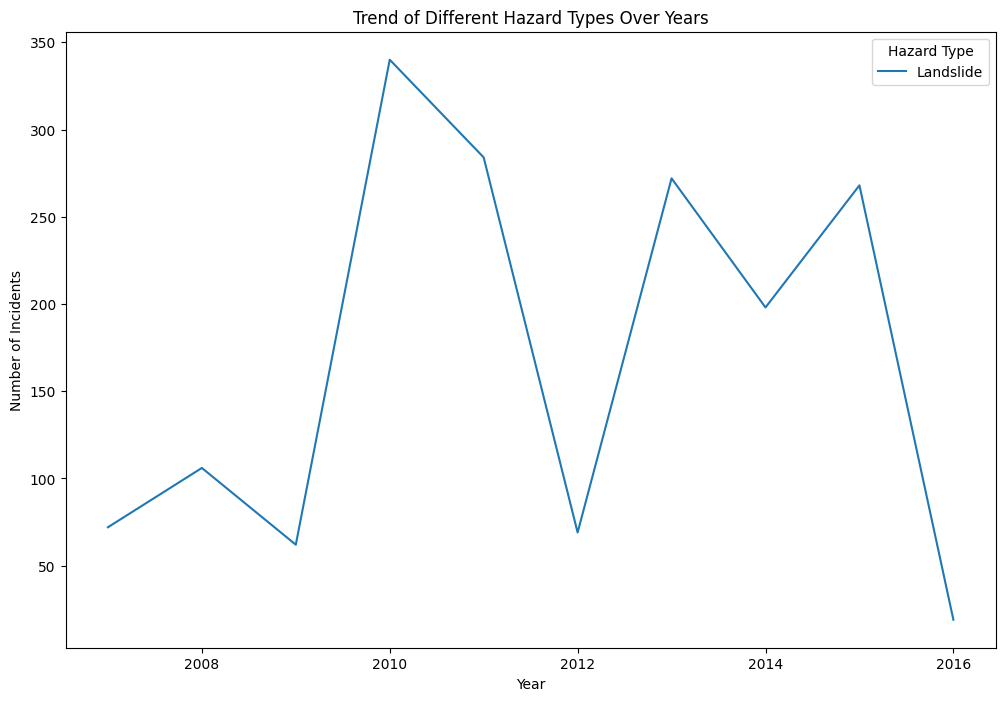

In [ ]:
#trend analysis
hazard_trend = data.groupby(['year', 'hazard_type']).size().unstack().fillna(0)

# Plotting the trend
hazard_trend.plot(kind='line', figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Trend of Different Hazard Types Over Years')
plt.legend(title='Hazard Type')
plt.show()

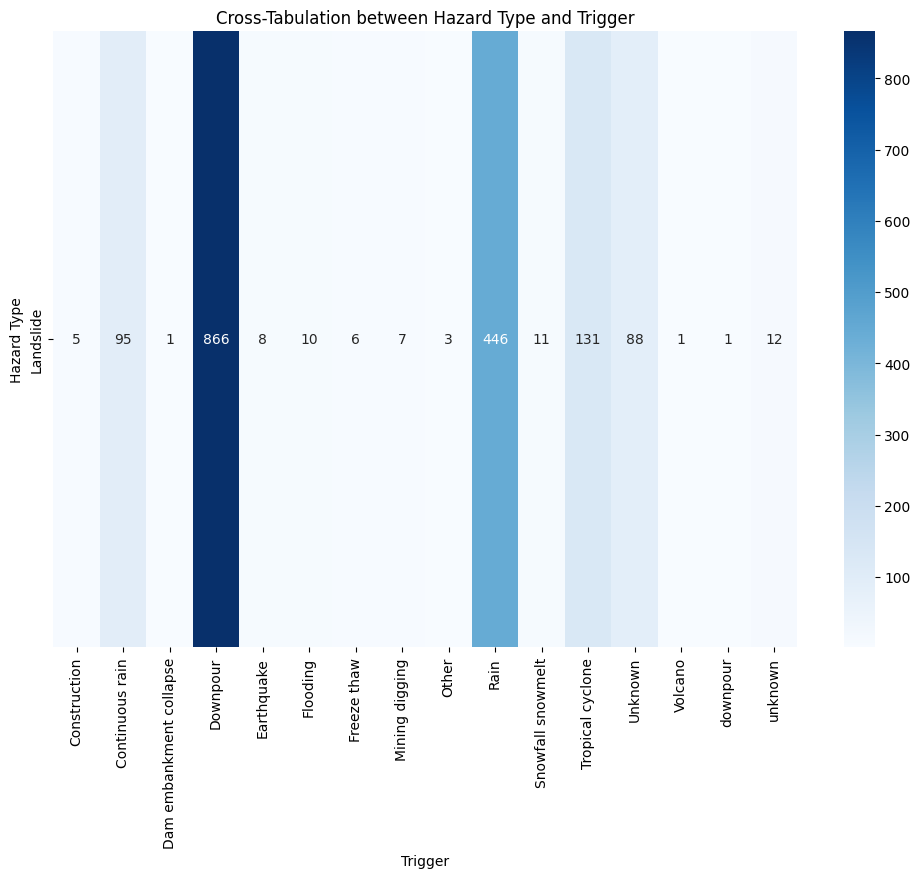

In [ ]:
# Cross-Tabulation Analysis
#Examine the relationship between two categorical variables.

#Example: Cross-Tabulation between Hazard Type and Trigger

from sklearn.decomposition import PCA

crosstab = pd.crosstab(data['hazard_type'], data['trigger'])

# Plotting the crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation between Hazard Type and Trigger')
plt.xlabel('Trigger')
plt.ylabel('Hazard Type')
plt.show()

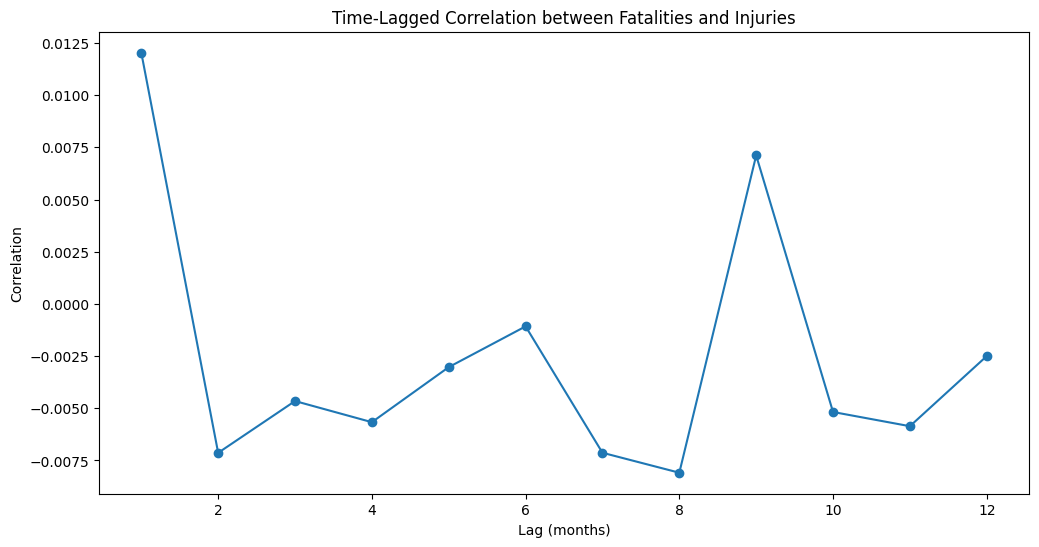

In [ ]:
#Time-Lagged Correlation
#Analyze how past values of one time series are related to current values of another.

#Example: Time-Lagged Correlation between Fatalities and Injuries

data['injuries'] = data['injuries'].fillna(0)
data['fatalities'] = data['fatalities'].fillna(0)

# Calculate time-lagged correlations
correlations = [data['fatalities'].corr(data['injuries'].shift(lag)) for lag in range(1, 13)]

# Plot time-lagged correlations
plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), correlations, marker='o')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.title('Time-Lagged Correlation between Fatalities and Injuries')
plt.show()

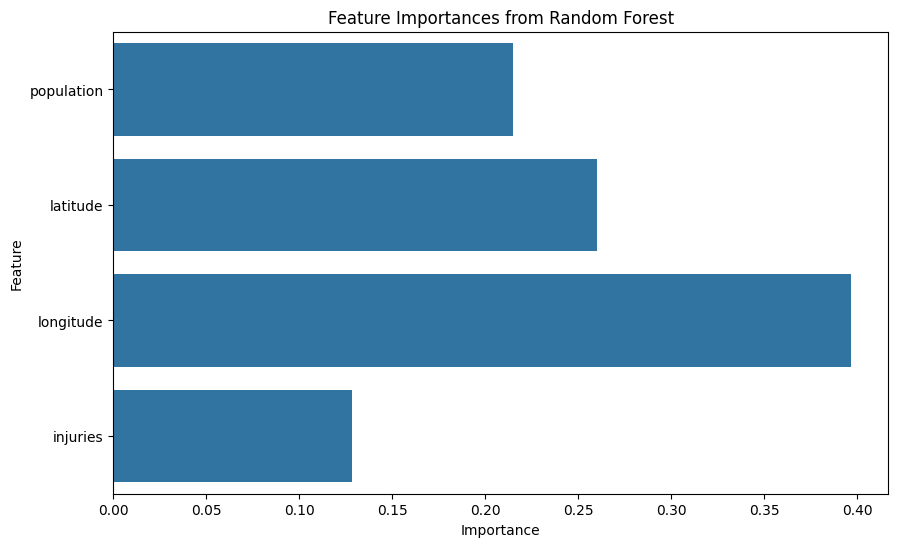

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
features = data[['population', 'latitude', 'longitude', 'injuries']].dropna()
target = data.loc[features.index, 'fatalities']

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


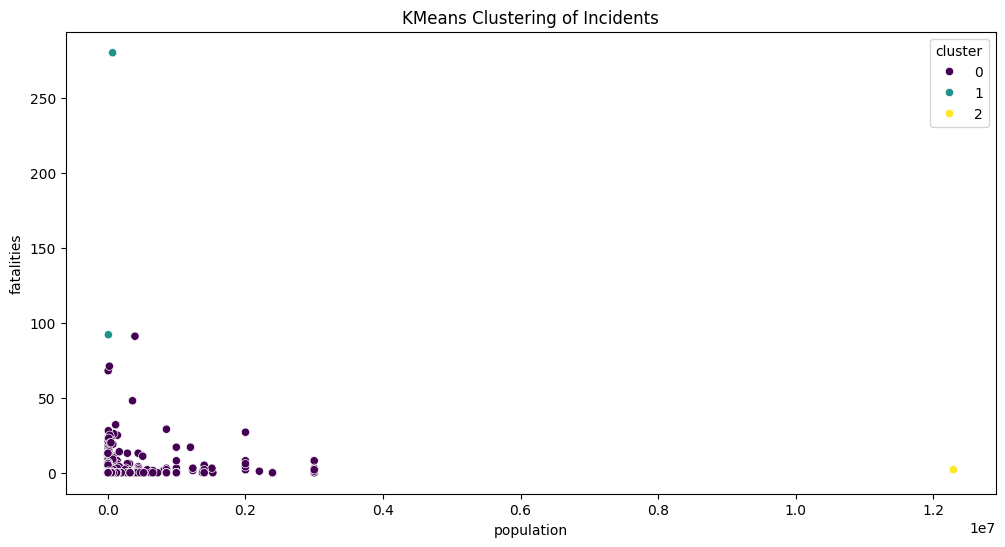

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features and scale them
features = data[['population', 'fatalities', 'injuries']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to the dataframe
data['cluster'] = pd.Series(clusters, index=features.index)

# Plot clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='population', y='fatalities', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of Incidents')
plt.show()

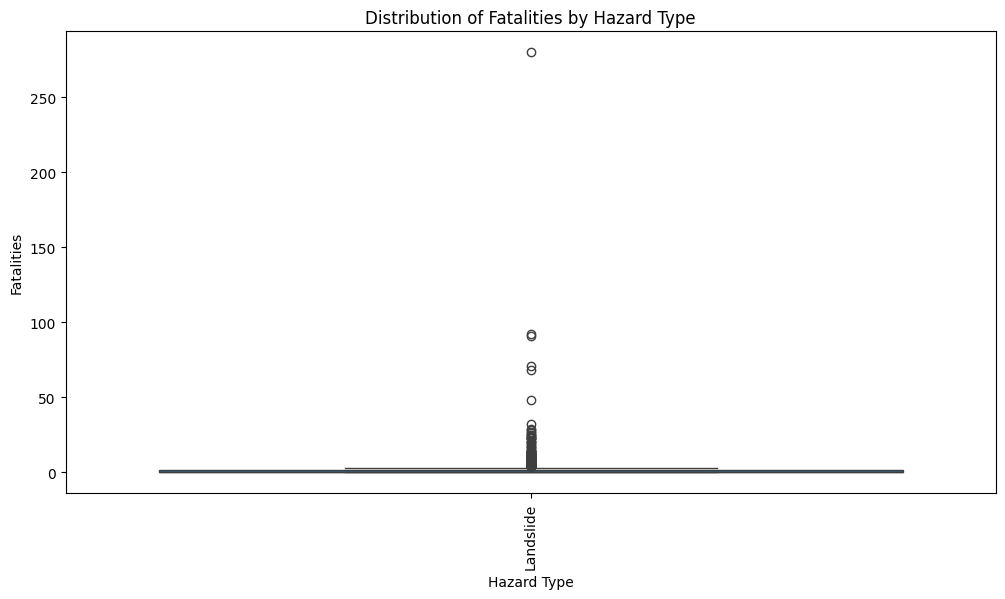

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='hazard_type', y='fatalities')
plt.xticks(rotation=90)
plt.xlabel('Hazard Type')
plt.ylabel('Fatalities')
plt.title('Distribution of Fatalities by Hazard Type')
plt.show()

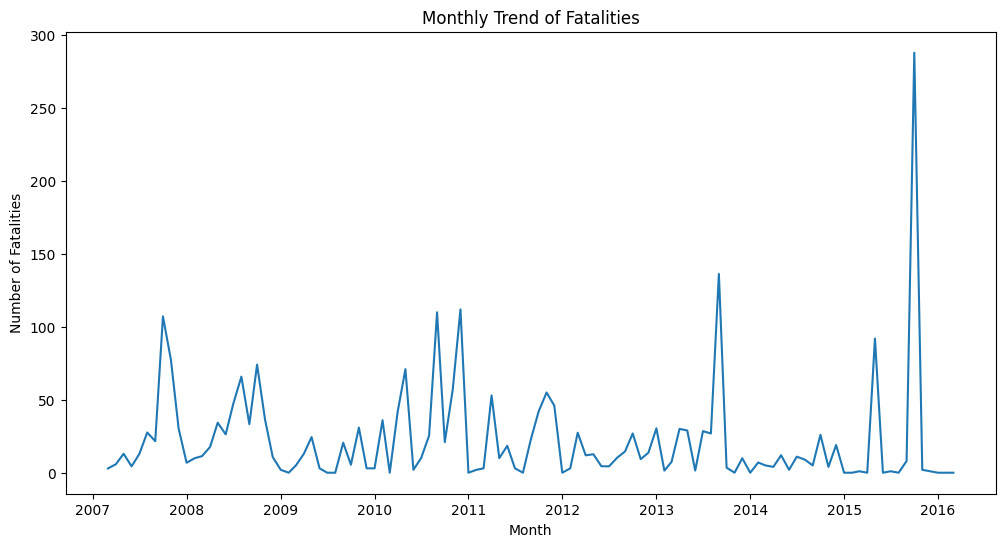

In [ ]:
data['month'] = data['date'].dt.to_period('M')

# Group by month and sum the fatalities
fatalities_per_month = data.groupby('month')['fatalities'].sum().reset_index()

# Convert month back to datetime for plotting
fatalities_per_month['month'] = fatalities_per_month['month'].dt.to_timestamp()

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=fatalities_per_month, x='month', y='fatalities')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.title('Monthly Trend of Fatalities')
plt.show()

ERROR: Could not find a version that satisfies the requirement KaplanMeierFitter (from versions: none)
ERROR: No matching distribution found for KaplanMeierFitter


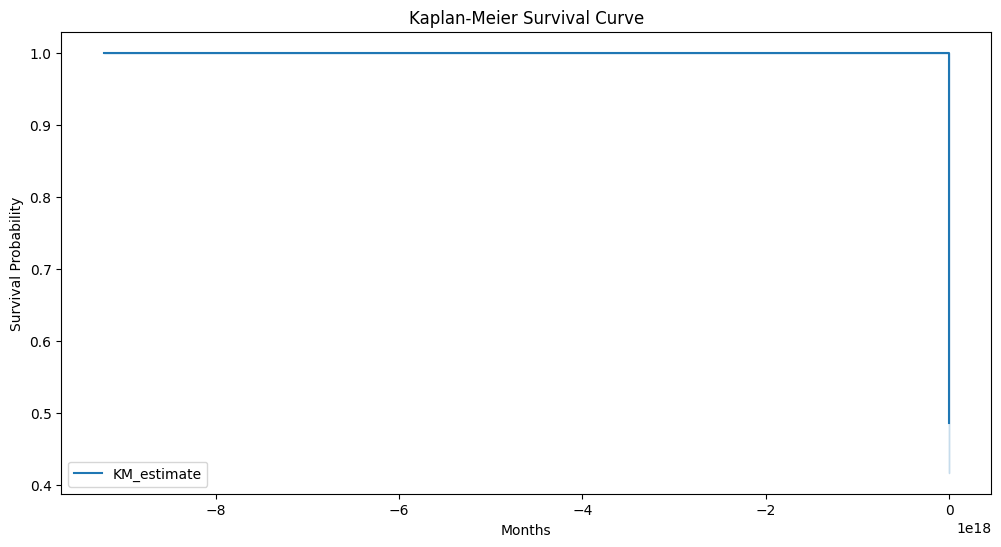

In [ ]:
!pip install lifelines
!pip install lifelines[plot]
!pip install KaplanMeierFitter
from lifelines import KaplanMeierFitter

# Assume 'date' column represents the start date and 'fatalities' indicates event occurrence
data['event_occurred'] = data['fatalities'] > 0
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations=data['date'].dt.to_period('M').view(int), event_observed=data['event_occurred'])

# Plot the survival function
plt.figure(figsize=(12, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract the year from the date
data['year'] = data['date'].dt.year

# Group by year and sum the fatalities
fatalities_per_year = data.groupby('year')['fatalities'].sum().sort_values(ascending=False)

# Identify the year with the most fatalities
most_fatalities_year = fatalities_per_year.idxmax()
most_fatalities_count = fatalities_per_year.max()

print(f"The year with the most fatalities is {most_fatalities_year} with {most_fatalities_count} fatalities.")
print(fatalities_per_year.head())

The year with the most fatalities is 2010.0 with 489.45919778699863 fatalities.
year
2010.0    489.459198
2015.0    393.000000
2008.0    374.439834
2013.0    304.929461
2007.0    303.041494
Name: fatalities, dtype: float64


In [ ]:
# Filter data for the year with the most fatalities
data_most_fatal_year = data[data['year'] == most_fatalities_year]

# Group by hazard type to see which hazards were most deadly in that year
hazard_fatalities = data_most_fatal_year.groupby('hazard_type')['fatalities'].sum().sort_values(ascending=False)
print(hazard_fatalities.head())



hazard_type
Landslide    489.459198
Name: fatalities, dtype: float64


In [ ]:
# Group by country to see which countries were most affected in that year
country_fatalities = data_most_fatal_year.groupby('country_name')['fatalities'].sum().sort_values(ascending=False)
print(country_fatalities.head())

country_name
Colombia      143.0
Guatemala     123.0
Mexico         80.0
Peru           42.0
Costa Rica     28.0
Name: fatalities, dtype: float64
